## Week-5 activities

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [4]:
simple_df = pd.read_excel('dataset/w5-simple-regression-trainset.xlsx',sheet_name='Sheet1')

In [5]:
simple_df.shape

(20, 2)

In [6]:
simple_df.head(n=10)

,x,y
0,1,76
1,2,78
2,2,85
3,4,88
4,2,72
5,1,69
6,5,94
7,4,94
8,2,88
9,4,92


Task 1. Draw a linear regression line through the dataset `dataset/w5-simple-regression-trainset.xlsx`. Please note: the excel file contains data only in `Sheet1`. **Using Scikit-learn library allowed.**


In [7]:
x = simple_df.iloc[:,0]
y = simple_df.iloc[:,-1]

In [8]:
#These are vectors; but need to be matrices with proper dim, like (20,1)
x.shape, y.shape

((20,), (20,))

In [9]:
#needs reshaping so that it becomes (20,1)
n = x.shape[0]
x= x.values.reshape(-1,1)
y =y.values.reshape(-1,1)
x.shape, y.shape

((20, 1), (20, 1))

In [10]:
#building linear regression model with a little help from scikit-learn
from sklearn.linear_model import LinearRegression
reg_model_scikit = LinearRegression()
reg_model_scikit.fit(x,y)

LinearRegression()

In [11]:
beta_1 = reg_model_scikit.coef_
beta_0 = reg_model_scikit.intercept_
print(f'The regression model is: \n y_hat = {beta_0} + {beta_1}x')

The regression model is: 
 y_hat = [67.16168898] + [[5.25025747]]x


In [12]:
#have the model predict x
x_seq = np.linspace(0,8,100).reshape(-1,1) #for regression line plotting
y_pred = reg_model_scikit.predict(x_seq)

Text(0, 0.5, 'y')

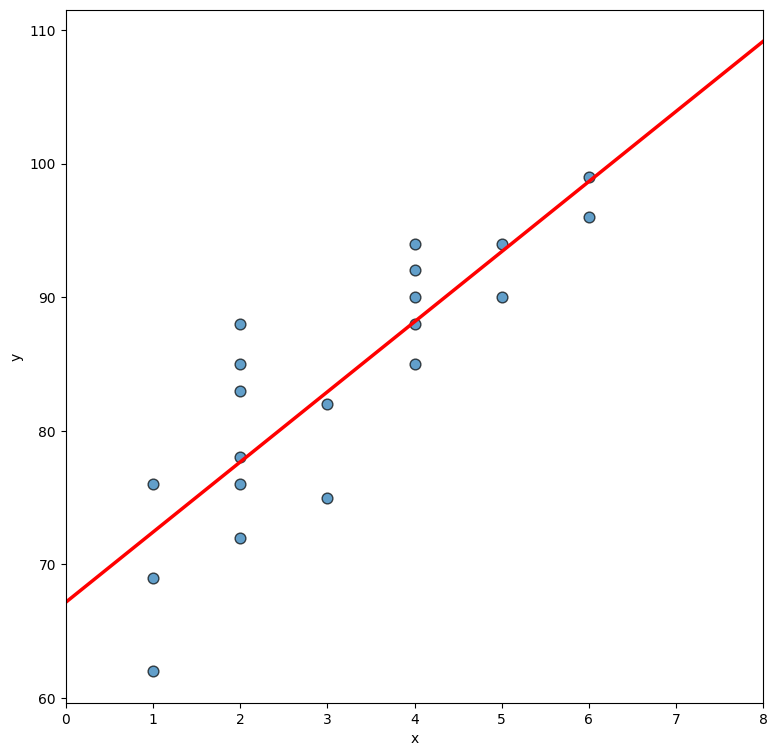

In [13]:
import matplotlib.pyplot as plt
# Initialize layout
fig, ax = plt.subplots(figsize=(9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
plt.xlim([0,8])

#generate x-axis points
# Plot regression line (in-red)
ax.plot(x_seq, y_pred, color="r", lw=2.5)
plt.xlabel('x')
plt.ylabel('y')


Task 2. Draw polynomial regression lines of degree 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100 through the dataset. Evaluate each of the models (including the model in #1) on the test set `datasets/w5-simple-testset.xlsx` in terms of RMSE and R2-score. Comments? **Using scikit-learn library allowed.**


In [14]:
test_df = pd.read_excel('dataset/w5-simple-regression-testset.xlsx',sheet_name='Sheet1')
test_df.shape

(6, 2)

In [15]:
test_df.head()

,x,y
0,1.5,69.00
1,2.5,80.33
2,3.5,78.50
3,4.5,89.80
4,5.5,92.00


In [16]:
#test set
x_test = test_df.iloc[:,0].values.reshape(-1,1)
y_test = test_df.iloc[:,-1].values.reshape(-1,1)

In [17]:
#degree
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

In [18]:
x_train_poly = poly.fit_transform(x)

In [19]:
x_test_poly = poly.transform(x_test) #only transform x_test features

In [20]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly,y) #training with polynomial features

LinearRegression()

In [21]:
x_test_seq = np.linspace(0,8,100).reshape(-1,1) #for regression line plotting
x_test_seq_poly = poly.transform(x_test_seq)

In [22]:
y_pred_seq = poly_reg_model.predict(x_test_seq_poly)

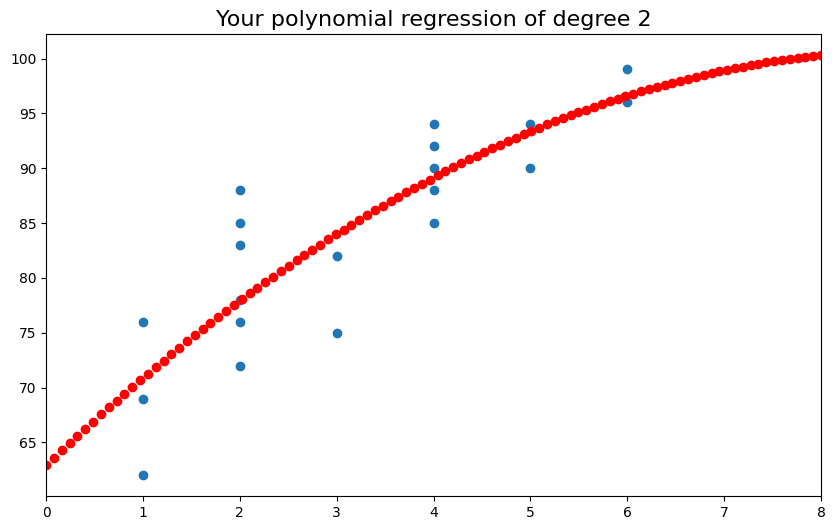

In [23]:
plt.figure (figsize= (10, 6))
plt.title (f"Your polynomial regression of degree {degree}", size=16)
plt.xlim([0,8])
plt.scatter(x, y)
plt.scatter(x_test_seq, y_pred_seq, c="red" )
plt.show ()

In [24]:
#evaluation


#first predict our test samples
y_pred = poly_reg_model.predict(x_test_poly)


In [25]:
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R-squared error = {r2_score(y_test, y_pred)}')

RMSE = 4.2955507820861705
R-squared error = 0.7975952834094604


In [26]:
#Now let's try the same varying degrees of the regression polynomials
def polynomial_regression(x_train, y_train, x_test, y_test, degree=2):
    '''
    This function solves this task for (x,y) with polynomial regression of certain degree.
    Input: 
    x_train: input training feature (must be 1 dimensional)
    y_train: target feature (must be 1 dimensional)
    x_test: input test feature (must be 1 dimensional)
    y_test: target feature (must be 1 dimensional)
    degree: degree of the highest polynomial feature we want in the linear regression modeling

    Returns: nothing, but prints "nicely" the regression plot, RMSE, R-square"
    '''
    #make sure x and y are matrices of shape (n,1) instead of (n,)
    assert x_train.shape[1]==1, "shape of x_train must be (n,1)"
    assert y_train.shape[1]==1, "shape of y_train must be (n,1)"
    assert x_test.shape[1]==1, "shape of x_train must be (n,1)"
    assert y_test.shape[1]==1, "shape of y_train must be (n,1)"

    #Construct the sklearn.preprocessing.PolynomialFeatures instance
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    #transform the x_train dataset to include polynomial features
    x_train_poly = poly.fit_transform(x_train)
    
    #train the regression model with polynomial features
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(x_train_poly,y_train)

    #evaluate the regression model with test set
    #step 1: transform x_test to have polynomial features
    x_test_poly = poly.transform(x_test)
    #step 2: predict
    y_pred = poly_reg_model.predict(x_test_poly)
    #step 3: evaluate
    print(f'=========================================')
    print(f'Evaluation result with degree = {degree}')
    print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R-squared = {r2_score(y_test, y_pred)}')
    print(f'If R-squared == 0, the model is performing equally as mean model')
    print(f'If R-squared > 0, the model is performing better than the mean model')
    print(f'If R-squared < 0, the model is worse than mean model')


    #Now, plot
    #Need some points for regression line
    x_test_seq = np.linspace(np.min(x_train)-1,np.max(x_train)+1,100).reshape(-1,1) #for regression line plotting
    x_test_seq_poly = poly.transform(x_test_seq)
    y_pred_seq = poly_reg_model.predict(x_test_seq_poly) #predict
    
    plt.figure (figsize= (10, 6))
    plt.title (f"Your polynomial regression of degree {degree}", size=16)
    plt.xlim([0,8])
    plt.scatter(x_train, y_train)
    plt.scatter(x_test_seq, y_pred_seq, c="red" )
    plt.show ()
    
    
    

    

In [27]:
train_df = pd.read_excel('dataset/w5-simple-regression-trainset.xlsx',sheet_name='Sheet1')
test_df = pd.read_excel('dataset/w5-simple-regression-testset.xlsx',sheet_name='Sheet1')
train_df.shape, test_df.shape

((20, 2), (6, 2))

In [28]:
x_train = train_df.iloc[:,0].values.reshape(-1,1)
y_train = train_df.iloc[:,-1].values.reshape(-1,1)
x_test = test_df.iloc[:,0].values.reshape(-1,1)
y_test = test_df.iloc[:,-1].values.reshape(-1,1)

Evaluation result with degree = 2
RMSE = 4.2955507820861705
R-squared = 0.7975952834094604
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


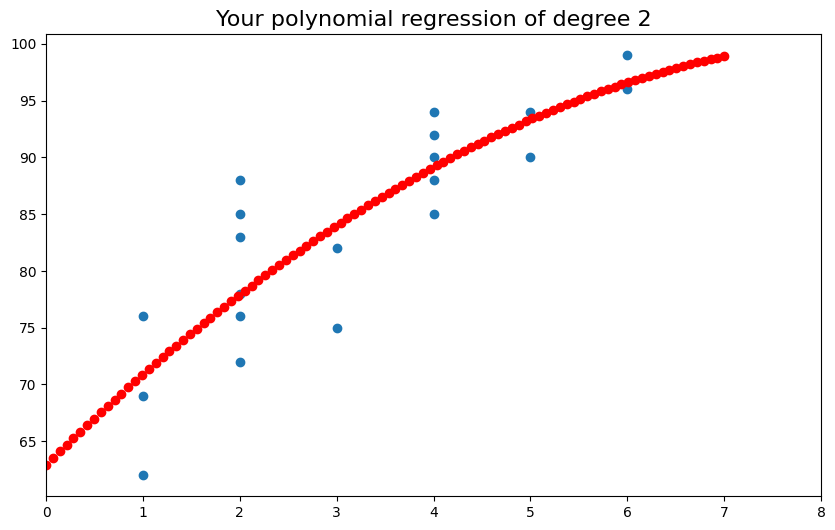

Evaluation result with degree = 3
RMSE = 4.600194916438478
R-squared = 0.7678678035763747
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


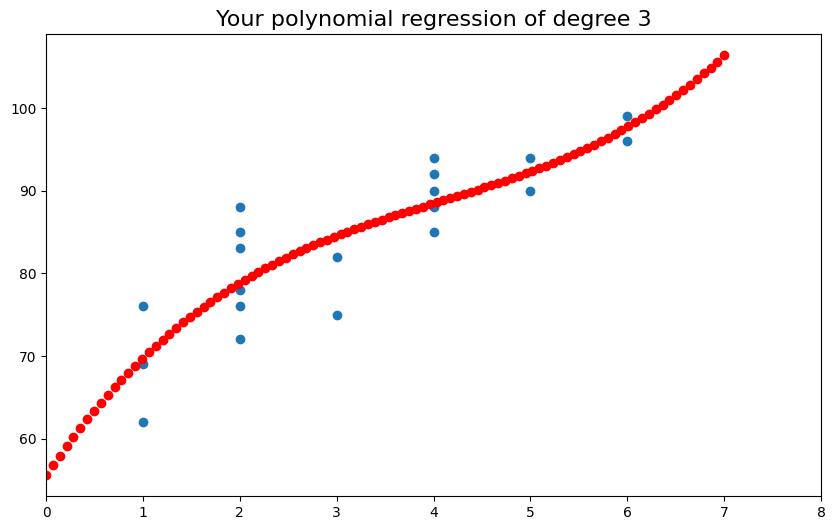

Evaluation result with degree = 4
RMSE = 4.787088451906308
R-squared = 0.7486228387897245
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


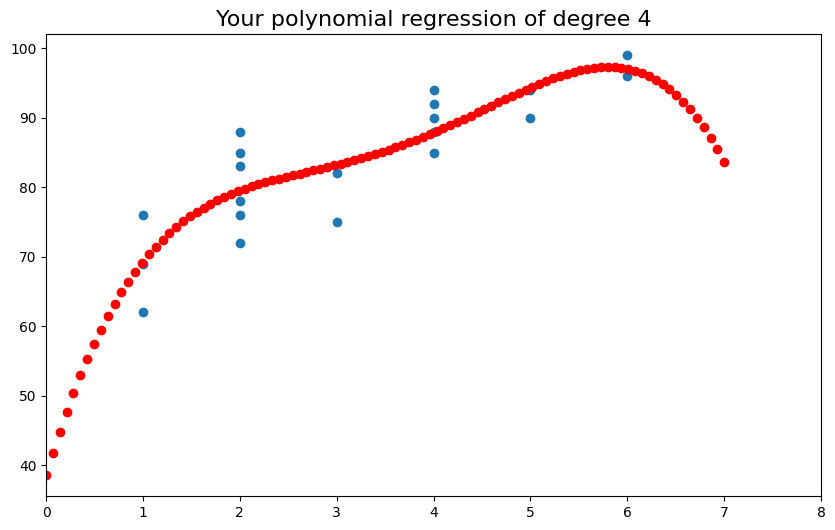

Evaluation result with degree = 5
RMSE = 16.59543220416446
R-squared = -2.0210648520277115
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


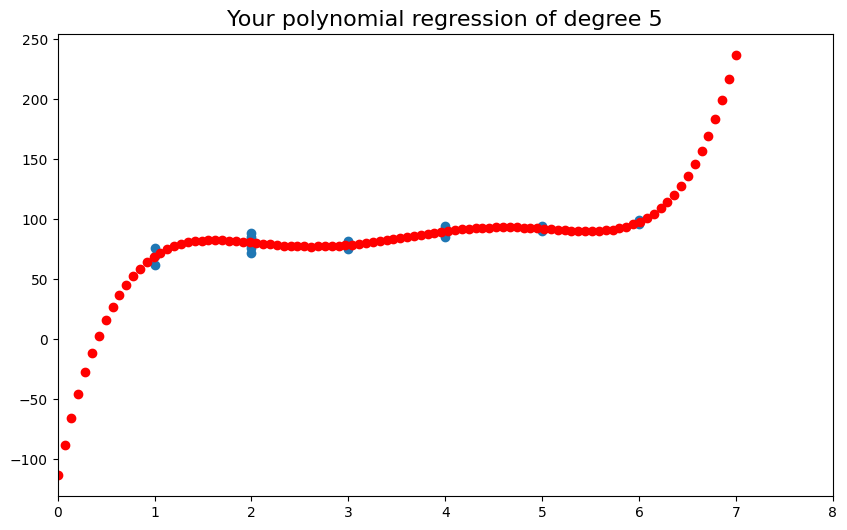

Evaluation result with degree = 6
RMSE = 27.901357469750184
R-squared = -7.539522356194505
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


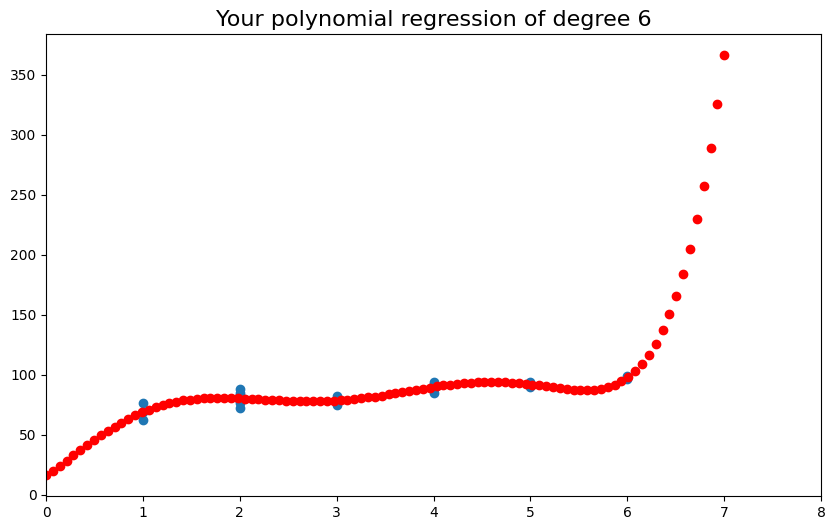

Evaluation result with degree = 7
RMSE = 53.9879745844083
R-squared = -30.97252847288168
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


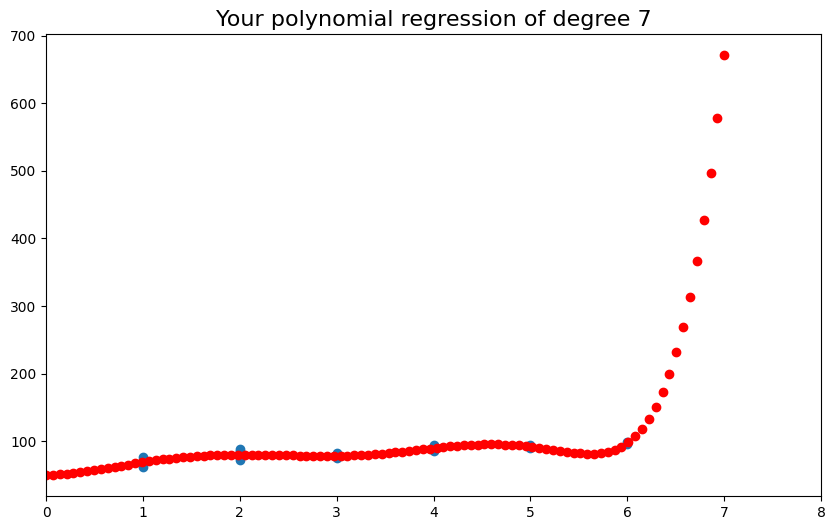

Evaluation result with degree = 8
RMSE = 119.08334429787038
R-squared = -154.5553522861055
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


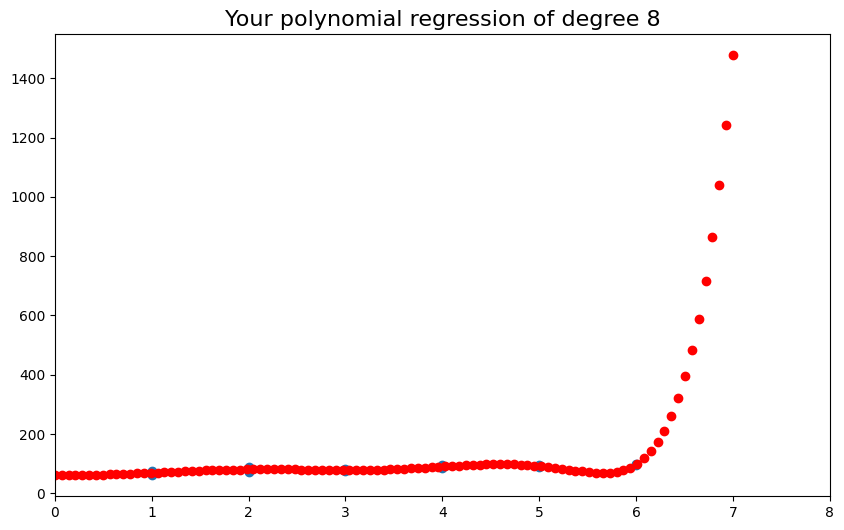

Evaluation result with degree = 9
RMSE = 299.5655133446533
R-squared = -983.3885265172457
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


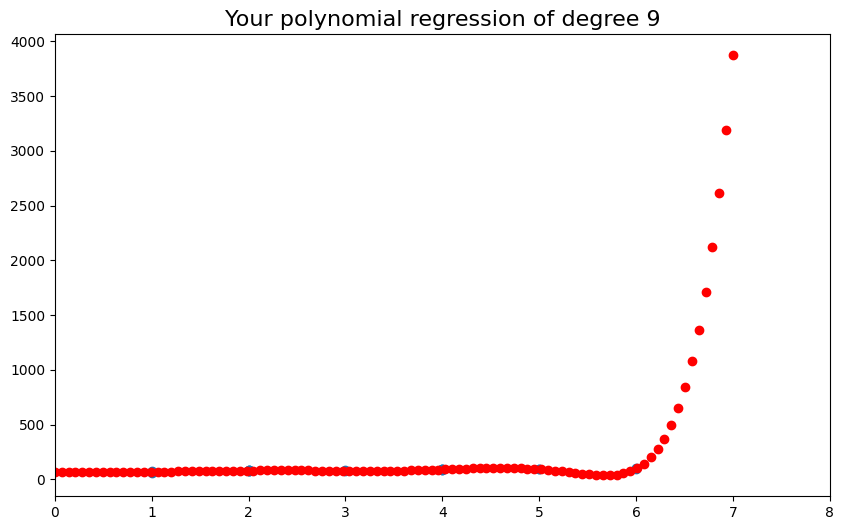

Evaluation result with degree = 10
RMSE = 844.5274539372875
R-squared = -7822.668809509711
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


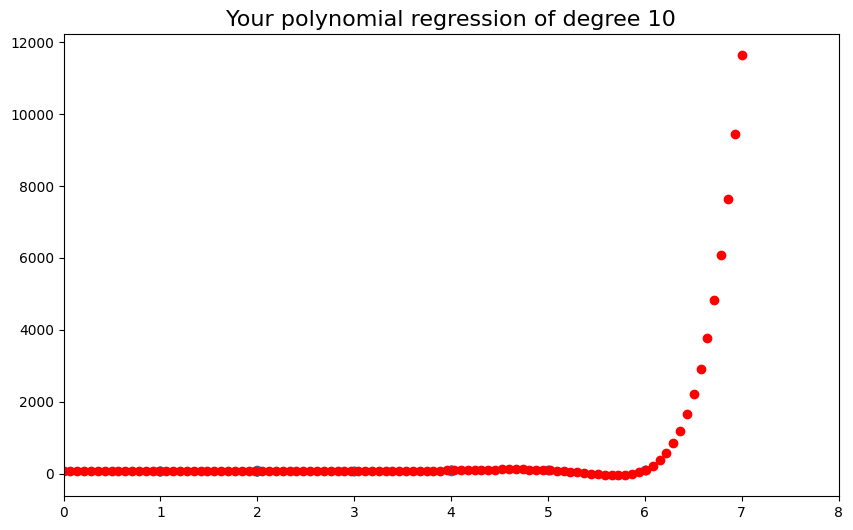

Evaluation result with degree = 20
RMSE = 110321639.32762976
R-squared = -133507088972866.2
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


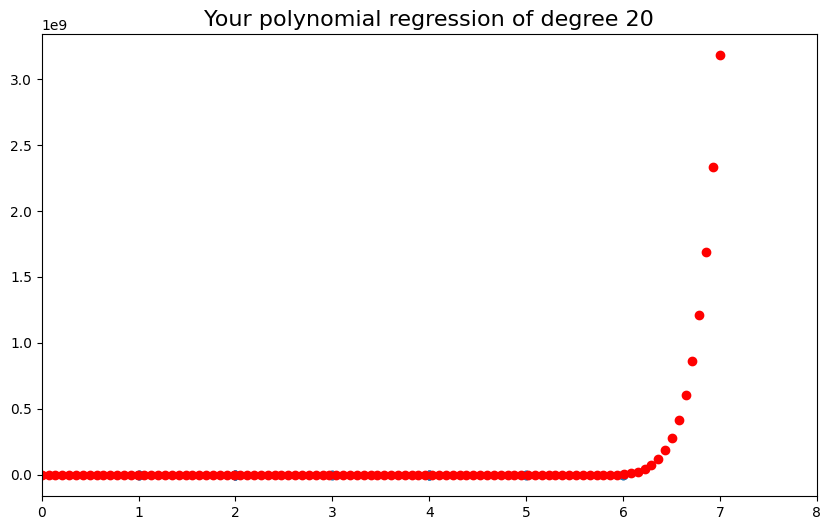

Evaluation result with degree = 50
RMSE = 24505337544.2985
R-squared = -6.587252201234335e+18
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


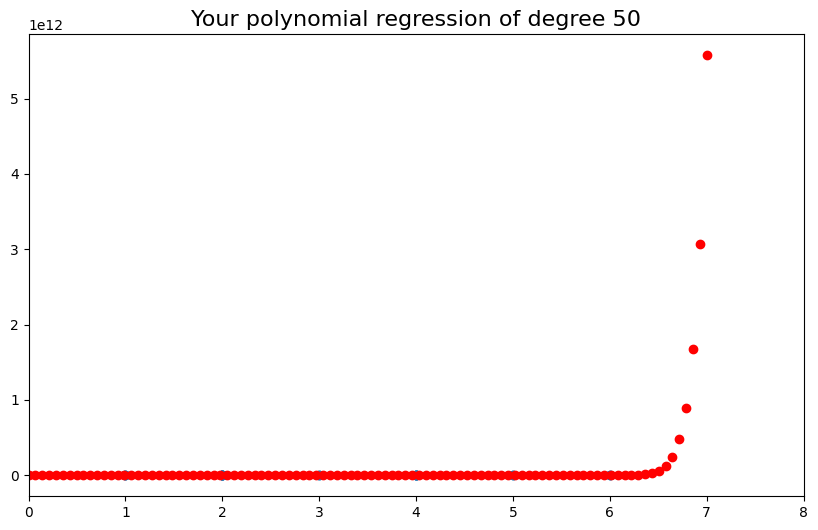

Evaluation result with degree = 100
RMSE = 423195758445.5798
R-squared = -1.9645610339111e+21
If R-squared == 0, the model is performing equally as mean model
If R-squared > 0, the model is performing better than the mean model
If R-squared < 0, the model is worse than mean model


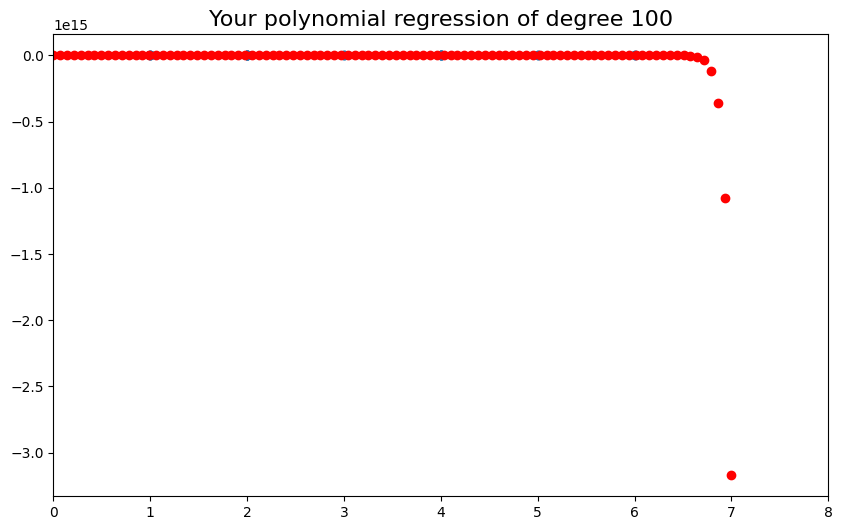

In [29]:
for degree in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]:
    polynomial_regression(x_train,y_train,x_test,y_test, degree=degree)
    #break

Task 3. **Using scikit-learn library NOT ALLOWED**: Assuming you have gone through regression model lecture slides `Week-04-05--Regression-ML-Fall2024.pdf`. Build a simple linear regression model with the same `dataset/w5-simple-regression-trainset.xlsx` dataset in `Sheet1` with the following methods: i) closed form solution, ii) batch gradient descent, iii) stochastic gradient descent, iv) mini-batch gradient descent. And, compare your results with the evaluation metrics you got in #2.
   - For methods (ii)-(iv) vary value of learning rate and save all evaluation metrics.
   - For methods (iv) vary batch size and save all evaluation metrics.


In [30]:
train_df = pd.read_excel('dataset/w5-simple-regression-trainset.xlsx',sheet_name='Sheet1')
test_df = pd.read_excel('dataset/w5-simple-regression-testset.xlsx',sheet_name='Sheet1')
train_df.shape, test_df.shape

((20, 2), (6, 2))

In [31]:
x_train = train_df.iloc[:,0].values.reshape(-1,1)
y_train = train_df.iloc[:,-1].values.reshape(-1,1)
x_test = test_df.iloc[:,0].values.reshape(-1,1)
y_test = test_df.iloc[:,-1].values.reshape(-1,1)

In [32]:
#add bias term
X = np.hstack( (np.ones([x_train.shape[0],1], x_train.dtype), x_train) )


### i) closed-form ~ no scikit-learn (!)

In [33]:
beta = np.random.random_sample(size = (2,1)) #[beta_0, beta_1]^T
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y_train)

In [34]:
beta.shape

(2, 1)

In [35]:
print(f'Our regression model is: y_hat = {beta[0]} + {beta[1]}x')

Our regression model is: y_hat = [67.16168898] + [5.25025747]x


In [36]:
#Now, predict the test set with our model
x_test_with_bias = np.hstack( (np.ones([x_test.shape[0],1], x_test.dtype), x_test) )

In [37]:
x_test_with_bias.shape

(6, 2)

In [38]:
y_pred = np.dot(x_test_with_bias,beta)
y_pred.shape

(6, 1)

In [39]:
rmse = np.sqrt(np.sum((y_test-y_pred)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.42736937643839


In [40]:
r2score = 1 - (np.sum((y_test-y_pred)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7849821936348281


### ii) batch gradient descent ~ no scikit-learn (!)

In [41]:
#initialize beta
beta = np.random.random_sample(size = (X.shape[1],1)) #[beta_0, beta_1]^T
beta_old = beta.copy() #this will store beta scores from previous iteration

In [42]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-4

In [43]:
#the gradient update loop
i = 0
while reach_convergence == False:
    gradient = (1/n)* np.dot(X.T , (np.dot(X,beta) - y_train))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if i % 1000 == 0:
        print(f'Epoch {i+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
print(f'Epoch {i+1}: Batch Gradient Descent Algo Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

Epoch 1: beta = [[1.14652103], [3.45771264], delta = 2.774455305334536
Epoch 1001: beta = [[57.45885375], [7.76257788], delta = 0.018514375811474665
Epoch 2001: beta = [[65.62919187], [5.64706146], delta = 0.0029242202710262834
Epoch 3001: beta = [[66.91964144], [5.31292997], delta = 0.00046186078756534364
Epoch 3832: Batch Gradient Descent Algo Converged
Solution: beta = [[67.10937033], [5.26380415], delta = 9.983134649051923e-05


In [44]:
#now predict with it
y_pred_batch = np.dot(x_test_with_bias,beta)
y_pred_batch.shape

(6, 1)

In [45]:
rmse = np.sqrt(np.sum((y_test-y_pred_batch)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.427678603228946


In [46]:
r2score = 1 - (np.sum((y_test-y_pred_batch)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7849521570228035


### ii) Stochastic Gradient Descent ~ no scikit-learn (!)

In [47]:
#initialize beta
beta = np.random.random_sample(size = (X.shape[1],1)) #[beta_0, beta_1]^T
beta_old = beta.copy() #this will store beta scores from previous iteration

In [48]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-6

In [49]:
#shuffle training set, or keep a record of shuffled indices
indices = np.arange(n)
np.random.shuffle(indices)

In [50]:
#The gradient update loop
i = 0
iter = 0
num_epochs = 0
while reach_convergence == False:
    #grab a sample
    x_sample = X[indices[i],:].reshape(1,-1) #a row vector, not a column vector
    #compute gradient
    gradient =  np.dot(x_sample.T , (np.dot(x_sample,beta) - y_train[indices[i]]))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if iter % 1000 == 0:
        print(f'Step {iter+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
    iter = iter + 1
    if i >= n: # next epoch begins
        np.random.shuffle(indices)
        num_epochs = num_epochs + 1
        i = 0 #reset
print(f'Step {iter+1}, Epoch {num_epochs}: Stochastic Gradient Descent Algo Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

Step 1: beta = [[1.45675011], [2.60698862], delta = 2.3092456725993795
Step 1001: beta = [[58.09023182], [7.77475834], delta = 0.10262967086305218
Step 2001: beta = [[65.77489922], [5.59403948], delta = 0.091848032523994
Step 3001: beta = [[67.01846959], [5.28953736], delta = 0.2660671552445693
Step 4001: beta = [[67.11331208], [5.13287363], delta = 0.04684489659842631
Step 5001: beta = [[67.34387207], [5.43810079], delta = 0.14424534905072003
Step 6001: beta = [[67.18713612], [5.17748141], delta = 0.07221836420673311
Step 7001: beta = [[67.17074726], [5.16795668], delta = 0.1296133416965703
Step 8001: beta = [[67.22519153], [5.28505311], delta = 0.04225692446160561
Step 9001: beta = [[67.26511063], [5.19229082], delta = 0.1970012960477541
Step 10001: beta = [[67.18104135], [5.35449001], delta = 0.13863671733032598
Step 11001: beta = [[67.22899951], [5.20073808], delta = 0.05152156654075256
Step 12001: beta = [[67.18737087], [5.14797413], delta = 0.08928957881268916
Step 13001: beta = 

In [51]:
#now predict with it
y_pred_stochastic = np.dot(x_test_with_bias,beta)
y_pred_stochastic.shape

(6, 1)

In [52]:
rmse = np.sqrt(np.sum((y_test-y_pred_stochastic)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.844396679920544


In [53]:
r2score = 1 - (np.sum((y_test-y_pred_stochastic)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.742568131505047


### iii) Mini-batch Gradient Descent ~ no scikit-learn (!)

In [54]:
#initialize beta
beta = np.random.random_sample(size = (X.shape[1],1)) #[beta_0, beta_1]^T
beta_old = beta.copy() #this will store beta scores from previous iteration

In [55]:
#num of sample
n = X.shape[0]
#learning rate
alpha = 0.01
reach_convergence = False
delta = 0 #distance between two betas
eps = 1e-3
b = 5 #batch_size

In [56]:
#shuffle training set, or keep a record of shuffled indices
indices = np.arange(n)
np.random.shuffle(indices)

In [57]:
#create the batch of indices
batch_of_indices = []
if n%b == 0:
    num_of_batches = int(n / b)
else:
    num_of_batches = n // b + 1
idx = 0
for _ in range(num_of_batches):
    batch_of_indices.append(indices[idx:idx+b])
    idx = idx + b

In [58]:
i = 0
iter = 0
num_epochs = 0
while reach_convergence == False:
    #grab a batch of samples
    X_sample = X[batch_of_indices[i],:]
    y_sample = y_train[batch_of_indices[i]].reshape(-1,1)
    #print(f'X_sample.shape = {X_sample.shape}, y_sample.shape = {y_sample.shape}')
    
    #compute gradient
    gradient = (1/b)* np.dot(X_sample.T , (np.dot(X_sample,beta) - y_sample))
    beta = beta - alpha * gradient

    #convergence test
    delta = np.sqrt(np.sum( (beta_old - beta)**2 ) )
    if delta < eps:
        reach_convergence = True
    if iter % 1000 == 0:
        print(f'Step {iter+1}: beta = [{beta[0]}, {beta[1]}, delta = {delta}')
    beta_old = beta
    i = i + 1
    iter = iter + 1
    if i >= num_of_batches: # next epoch begins
        np.random.shuffle(indices)
        #create the batch of indices (again)
        batch_of_indices = []
        if n%b == 0:
            num_of_batches = int(n / b)
        else:
            num_of_batches = n // b + 1
        idx = 0
        for _ in range(num_of_batches):
            batch_of_indices.append(indices[idx:idx+b])
            idx = idx + b
        #increment epoch counter
        num_epochs = num_epochs + 1
        i = 0 #reset
print(f'Step {iter+1}, Epoch {num_epochs}: Mini-batch Gradient Descent Algo (with batch_size = {b}) Converged')
print(f'Solution: beta = [{beta[0]}, {beta[1]}, delta = {delta}')

Step 1: beta = [[1.13539225], [3.99474493], delta = 3.3997224136290924
Step 1001: beta = [[57.61128575], [7.79988087], delta = 0.10182000514459673
Step 2001: beta = [[65.6750413], [5.6610003], delta = 0.022562862353096343
Step 2825, Epoch 706: Mini-batch Gradient Descent Algo (with batch_size = 5) Converged
Solution: beta = [[66.84418788], [5.32354407], delta = 0.0009692614829965393


In [59]:
#now predict with it
y_pred_minibatch = np.dot(x_test_with_bias,beta)
y_pred_minibatch.shape

(6, 1)

In [60]:
rmse = np.sqrt(np.sum((y_test-y_pred_minibatch)**2)/len(y_test))
print(f'RMSE = {rmse}')

RMSE = 4.402136949584538


In [61]:
r2score = 1 - (np.sum((y_test-y_pred_minibatch)**2)/ np.sum((y_test-np.mean(y_test))**2))
print(f'R2-score = {r2score}')

R2-score = 0.7874260650871515


Task 4. Build a regression model for dataset in `dataset/w5-multi-regression-trainset.xlsx`. Please note it's a multiple linear regression task. **Using scikit-learn library allowed**. Evaluate the model on the provided test set, `dataset/w5-multi-regression-testset.xlsx` in terms of RMSE and R2-score.


In [62]:
#It's similar code structure as in task #2. DIY

Task 5. Now, do the same as in task #4 without scikit-learn library. Apply the 4 solution approaches: (i) closed-form solution, (ii) batch gradient descent, (iii) stochastic gradient descent, (iv) mini-batch gradient descent. Don't forget to tune the *hyper-parameters* like learning rate.. Compare with results obtained in task #4.

In [63]:
#It's similar code structure as in task #3. DIY